# k-Nearest Neighbor Exercise (Re-do)

In [1]:
import random
import numpy as np 
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

# make matplotlib inline
%matplotlib inline

# reload external python modules
%load_ext autoreload
%autoreload 2

In [2]:
# load the raw cifar-10 directory 
cifar10_dir = "cs231n/datasets/cifar-10-batches-py"

# avoid the reloading issues by deleting the old data and importing new data
try:
    del X_train, y_train
    del X_test, y_test
    print("clean previously loaded data")
except:
    pass

# load training sets and test sets of data and labels from cifar-10
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


[36479 36978  1322 11517 12531 38116 15141]


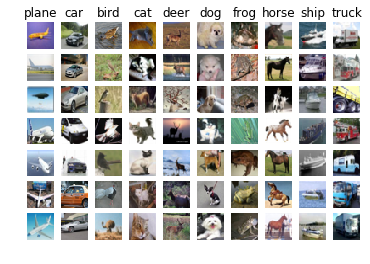

In [4]:
# show 7 samples from each of the 10 classes and visualize some examples in the dataset
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7

for y, c in enumerate(classes):
    # np.flatnonzero(x): return indices of the corresponding non-zero elements of x
    idxs = np.flatnonzero(y == y_train)
    
    # np.random.choice(a, size=None, replace=True): generate a random sample from 1D array a 
    #    replace=True: no repeated elements
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    
    for i, idx in enumerate(idxs):
        # ith rows with each of size num_classes (before) + yth class + 1 (as y is an index
        # starting from 1, we have to add one to make sure that subplot's third parameter >=1)
        plt_idx = i * num_classes + y + 1
        
        # matplotlib.pyplot.subplot(nrows, ncols, index): set up a subplot grid that has height
        # of nrows and width of ncols, and set the plt_idx's subplot as active 
        plt.subplot(samples_per_class, num_classes, plt_idx)
        
        # 1. numpy.ndarray.astype(dtype): Copy of the array, cast to a specified type (normalize the 
        # image by dtype as 'uint8')
        # 2. matplotlib.pyplot.imshow(X): display an image X
        plt.imshow(X_train[idx].astype('uint8'))
        
        # matplotlib.pyplot.axis(option): 
        # option can be: (off -> Turn off axis lines and labels)
        plt.axis('off')
        
        if (i == 0):
            # matplotlib.pyplot.title(label): Set a title (label) for the axes.
            plt.title(c)

print (idxs)
plt.show()

In [5]:
# subsample the data: 
# take the first 5000 training data and labels 
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

# take the first 500 test data and labels
num_test = 500 
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [6]:
# reshape the image into rows 

# numpy.reshape(a, newshape): Gives a newshape to an array a without changing its data 
# if one shape of dimesnion is -1, the value is inferred from the length of the array and remaining dimensions.
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print (X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In [7]:
# import the algorithm python file  
from cs231n.classifiers import KNearestNeighbor

# construct an instance of KNearestNeighbor and name it classifier 
classifier = KNearestNeighbor()

# we use train function to initiailize training data and labels
classifier.train(X_train, y_train)

In [8]:
# compute the distance by compute_distances_two_loops() and put it into dists
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)

(500, 5000)


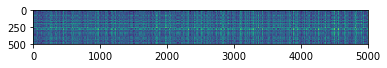

In [9]:
# show image with no interpolation (when interpolation='none', a big image is scaled down)
plt.imshow(dists, interpolation='none')
plt.show()

In [94]:
# predict the labels when k = 1 (Nearest Neighbor)
y_test_pred = classifier.predict_labels(dists, k=1)

# calculate the number of correctly predicted labels by determining whether test_prediction is equal to test
num_correct = np.sum(y_test_pred == y_test)

# calculate the accuracy by dividing correctly predicted labels by total number of test numbers
accuracy = float(num_correct / num_test)

print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000


In [95]:
# predict the labels when k = 5 (5-Nearest Neighbor), (and the accuracy should be slightly improved)
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct / num_test)
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 139 / 500 correct => accuracy: 0.278000


In [98]:
dists_one = classifier.compute_distances_one_loop(X_test)

# numpy.linalg.norm(x, ord=None): matrix or vector norm where order of the norm is ()
# In this case, when we calculate the difference of dists and dists_one to determine 
# whether two matrices are similar, we calculate Frobenius norm of their difference matrix
# and the formulae of Frobenius norm is ||A||_F = [\sum_{i,j} abs(a_{i,j})^2]^{1/2}

difference = np.linalg.norm(dists - dists_one, ord = 'fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good! The distance matrices are the same


In [99]:
dists_two = classifier.compute_distances_no_loops(X_test)

difference = np.linalg.norm(dists - dists_two, ord = 'fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good! The distance matrices are the same


In [100]:
import time
def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    Record the time before function executes and record the time after function executes.
    return the difference between two time points 
    """
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print('No loop version took %f seconds' % no_loop_time)

Two loop version took 30.885803 seconds
One loop version took 49.045940 seconds
No loop version took 0.335158 seconds


In [108]:
# designate the number of folds to 5 and k_choices to following choices 
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

# numpy.array_split(ary, indices or sections): Split an array into multiple sub-arrays.
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

# a dictionary storing the accuracies for different values of k that we find when 
# running cross-validation algorithm (using curly parantheses)
k_to_accuracies = {}

for k in k_choices:
    # for each of the k choices, we have 4 folds of training set and one fold of cross validation set
    k_to_accuracies[k] = []
    for n in list(range(num_folds)):
        X_cv_training = np.vstack(X_train_folds[x] for x in list(range(num_folds)) if x != n)
        y_cv_training = np.hstack(y_train_folds[x] for x in list(range(num_folds)) if x != n)
        X_cv_test = X_train_folds[n]
        y_cv_test = y_train_folds[n]
        
        classifier = KNearestNeighbor()
        classifier.train(X_cv_training, y_cv_training)
        
        y_pred = classifier.predict(X_cv_test, k=k, num_loops=0)
        k_to_accuracies[k].append(float(np.sum(y_pred == y_cv_test) / y_pred.shape[0]))
        
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.263000
k = 1, accuracy = 0.257000
k = 1, accuracy = 0.264000
k = 1, accuracy = 0.278000
k = 1, accuracy = 0.266000
k = 3, accuracy = 0.239000
k = 3, accuracy = 0.249000
k = 3, accuracy = 0.240000
k = 3, accuracy = 0.266000
k = 3, accuracy = 0.254000
k = 5, accuracy = 0.248000
k = 5, accuracy = 0.266000
k = 5, accuracy = 0.280000
k = 5, accuracy = 0.292000
k = 5, accuracy = 0.280000
k = 8, accuracy = 0.262000
k = 8, accuracy = 0.282000
k = 8, accuracy = 0.273000
k = 8, accuracy = 0.290000
k = 8, accuracy = 0.273000
k = 10, accuracy = 0.265000
k = 10, accuracy = 0.296000
k = 10, accuracy = 0.276000
k = 10, accuracy = 0.284000
k = 10, accuracy = 0.280000
k = 12, accuracy = 0.260000
k = 12, accuracy = 0.295000
k = 12, accuracy = 0.279000
k = 12, accuracy = 0.283000
k = 12, accuracy = 0.280000
k = 15, accuracy = 0.252000
k = 15, accuracy = 0.289000
k = 15, accuracy = 0.278000
k = 15, accuracy = 0.282000
k = 15, accuracy = 0.274000
k = 20, accuracy = 0.270000
k = 20, accu

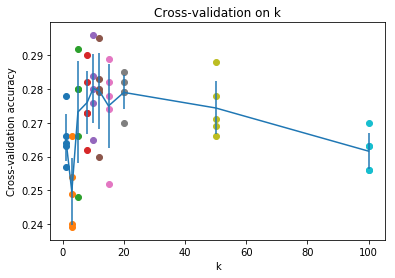

In [114]:
for k in k_choices:
    accuracies = k_to_accuracies[k]
    # matplotlib.pyplot.scatter(x, y): A scatter plot of y vs x with varying marker size and/or color.
    plt.scatter([k] * len(accuracies), accuracies)

# 1. sorted: returns a sorted list from the given iterable
# 2. <dictionary>.items(): return a view object that displays a list of a given dictionary's (key, value) tuple pair.
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])

# matplotlib.pyplot.errorbar(x, y, yerr=None): Plot y versus x as lines and/or markers with attached errorbars. 
# x, y define the data locations, xerr, yerr define the errorbar sizes.
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [112]:
best_k = 1

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000
